# **TeleMarketing Prediction Model Using Machine Learning Technique**

### Dataset Information and Science Direct Research Paper Link : https://archive.ics.uci.edu/dataset/222/bank+marketing

In [3]:
# Import Data Manimpulation Library
import numpy as np
import pandas as pd
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import FilterWarning Library
import warnings
warnings.filterwarnings('ignore')
# Import Sci-Kit Learn Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **Data Uploading**

In [4]:
url = 'https://raw.githubusercontent.com/chandanc5525/MachineLearning-Bootcamp/refs/heads/main/bank-additional-full.csv'

df = pd.read_csv(url,sep = ';')   # Important Step
df.sample(frac = 1)   # Shuffle Dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
627,35,services,single,basic.4y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23590,37,technician,married,university.degree,no,yes,yes,cellular,aug,thu,...,6,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
25115,48,technician,divorced,professional.course,no,unknown,unknown,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
35473,32,admin.,single,university.degree,no,yes,no,cellular,may,mon,...,7,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
23534,33,services,married,university.degree,unknown,yes,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32254,34,admin.,married,high.school,unknown,yes,no,cellular,may,fri,...,2,999,2,failure,-1.8,92.893,-46.2,1.313,5099.1,no
10976,26,technician,single,high.school,no,unknown,unknown,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
28168,29,technician,single,professional.course,no,yes,no,cellular,apr,mon,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.466,5099.1,yes
14322,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,mon,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


# **Data Attributes**

## **Bank Client Data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y',' basic.6y',' basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown') -- related with the last contact of the current campaign

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## **Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## **Social and economic context attributes:**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

## **Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
# Chekcing Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

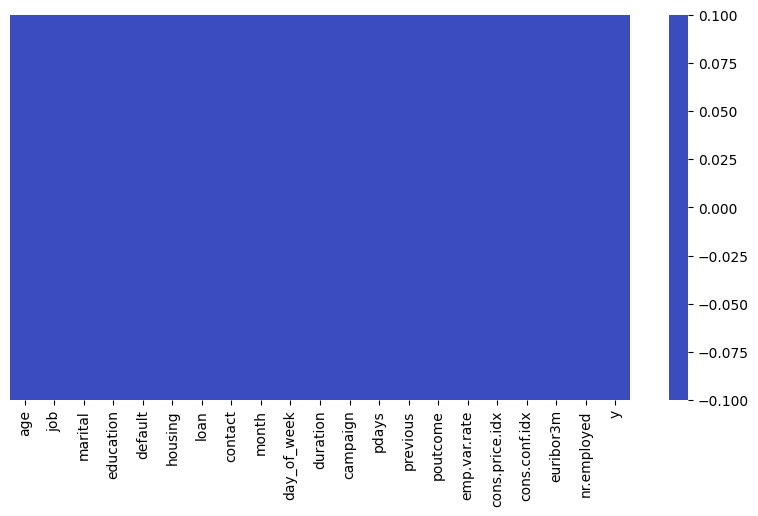

In [6]:
# By Visualization Checking if any null value present or not
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(),cmap='coolwarm',center = 0,yticklabels=False)
plt.show()

In [7]:
# Checking Dataset:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22193,30,technician,single,professional.course,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
26903,55,unemployed,married,university.degree,no,yes,no,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
24521,35,self-employed,single,professional.course,no,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
37676,33,admin.,married,high.school,no,yes,no,cellular,aug,wed,...,4,999,0,nonexistent,-2.9,92.201,-31.4,0.854,5076.2,no
25712,36,blue-collar,married,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [8]:
# Divide Dataset into Categorical and Numerical:

numerical_data = df.select_dtypes(exclude = 'object')
categorical_data = df.select_dtypes(include = 'object')

In [9]:
categorical_data.sample(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
40743,admin.,married,university.degree,no,yes,no,telephone,sep,wed,nonexistent,no
10384,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,nonexistent,no
30151,management,married,university.degree,no,yes,no,cellular,apr,thu,nonexistent,no
992,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,nonexistent,no
24691,entrepreneur,divorced,university.degree,no,no,no,cellular,nov,mon,nonexistent,no


In [10]:
numerical_data.sample(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
28150,45,129,1,999,0,-1.8,93.075,-47.1,1.466,5099.1
24661,43,222,2,999,0,-0.1,93.200,-42.0,4.191,5195.8
13643,31,136,1,999,0,1.4,93.918,-42.7,4.963,5228.1
13961,55,965,2,999,0,1.4,93.918,-42.7,4.963,5228.1
9058,41,131,10,999,0,1.4,94.465,-41.8,4.866,5228.1


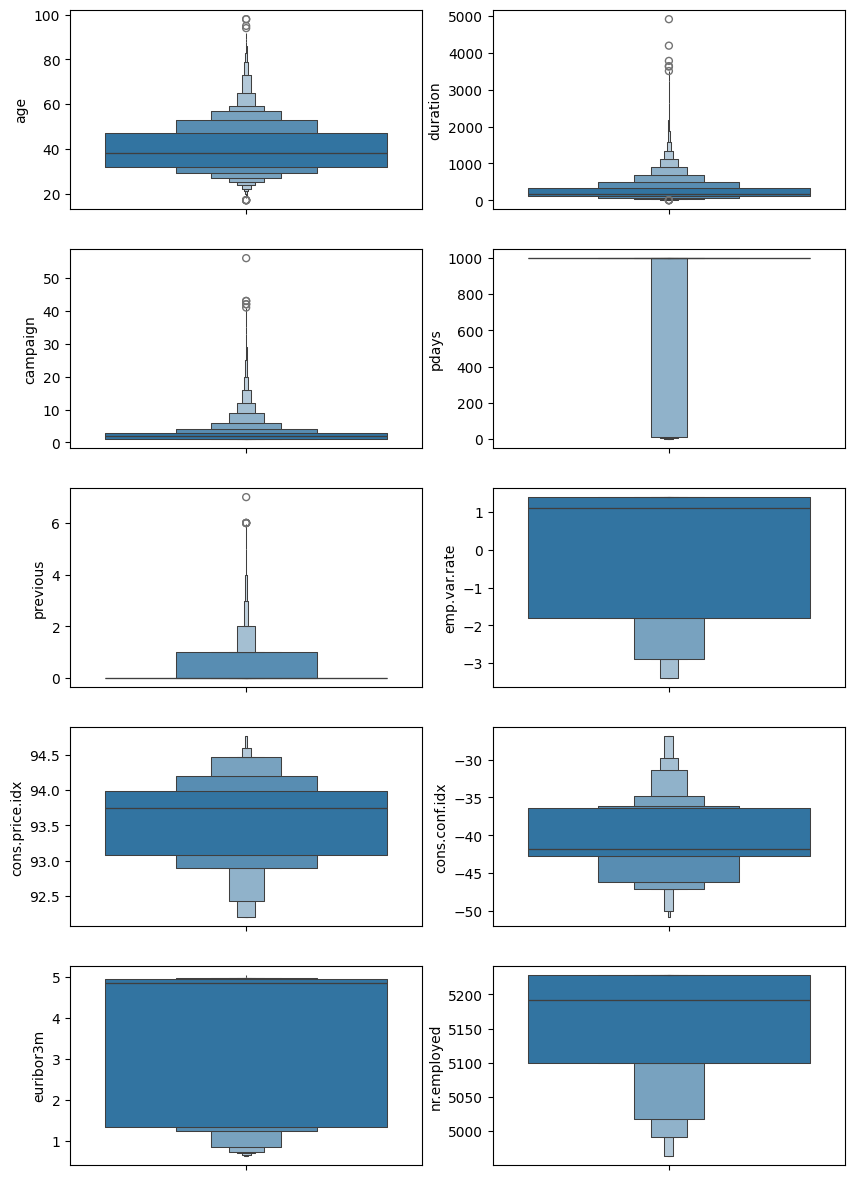

In [11]:
plt.figure(figsize = (10,15))
plt.tight_layout()
plot = 0

for i in numerical_data.columns:
  plot = plot + 1
  plt.subplot(5,2,plot)
  sns.boxenplot(df[i])
plt.show()

In [12]:
for i in categorical_data.columns:
    print(categorical_data[i].value_counts())
    print('*'*20)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
********************
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
********************
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
********************
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
********************
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
********************
loan
no         33950
yes         6248
unknow

In [13]:
df['y'].replace({'yes':1,'no':0},inplace = True)

In [14]:
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['default'] = LabelEncoder().fit_transform(df['default'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])

In [16]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1118,53,1,1,2,1,2,0,1,6,4,...,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
35510,41,0,2,6,0,2,0,0,6,1,...,2,999,0,1,-1.8,92.893,-46.2,1.244,5099.1,0
30578,35,3,2,6,0,0,2,0,6,1,...,4,999,0,1,-1.8,92.893,-46.2,1.354,5099.1,0
25569,31,1,1,3,0,0,0,0,7,4,...,1,999,0,1,-0.1,93.200,-42.0,4.120,5195.8,0
34670,27,0,2,6,0,2,0,0,6,2,...,4,999,0,1,-1.8,92.893,-46.2,1.266,5099.1,1


<Axes: xlabel='y'>

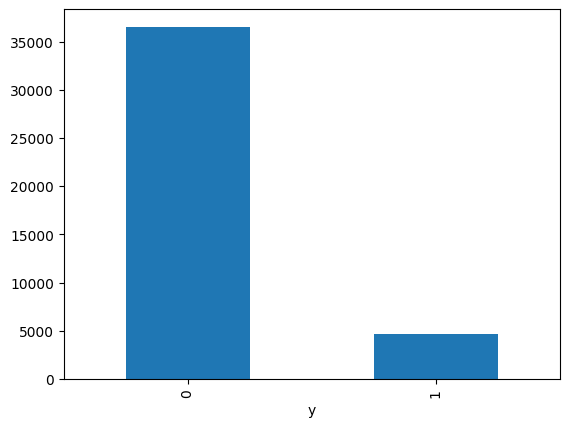

In [17]:
df['y'].value_counts().plot(kind = 'bar')

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [19]:
# Split the Dataset into Train and Test
X = df.drop(columns = ['y'], axis = 1)
y = df['y']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,
                                                 random_state = 42)

In [21]:
# Use Scaling Technique
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.max(),X_train.min()

(1.0, 0.0)

In [23]:
# Use Balance Dataset Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train,y_train = smote.fit_resample(X_train,y_train)

# **Random Forest Prediction Model**

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

print(accuracy_score(y_test,y_pred_rf))

0.9082301529497451


In [25]:
X.shape

(41188, 20)

# **ANN Model Building**

In [26]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [27]:
ann_model = Sequential()

ann_model.add(Dense(128,activation = 'relu',input_dim = 20))
ann_model.add(Dense(64,activation = 'relu'))
ann_model.add(Dense(32,activation = 'relu'))
ann_model.add(Dense(16,activation = 'relu'))
ann_model.add(Dense(1,activation = 'sigmoid'))

In [28]:
ann_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [29]:
ann_model.fit(X_train,y_train,epochs = 100,batch_size = 32,
              validation_split = 0.3)

Epoch 1/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8152 - loss: 0.4104 - val_accuracy: 0.8428 - val_loss: 0.4778
Epoch 2/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8741 - loss: 0.2840 - val_accuracy: 0.9314 - val_loss: 0.2999
Epoch 3/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8776 - loss: 0.2692 - val_accuracy: 0.7886 - val_loss: 0.5427
Epoch 4/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8832 - loss: 0.2560 - val_accuracy: 0.8879 - val_loss: 0.3662
Epoch 5/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8862 - loss: 0.2503 - val_accuracy: 0.8268 - val_loss: 0.4548
Epoch 6/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8875 - loss: 0.2446 - val_accuracy: 0.8466 - val_loss: 0.4255
Epoch 7/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8892 - loss: 0.2463 - val_accuracy: 0.9001 - val_loss: 0.3425
Epoch 8/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8927 - loss: 

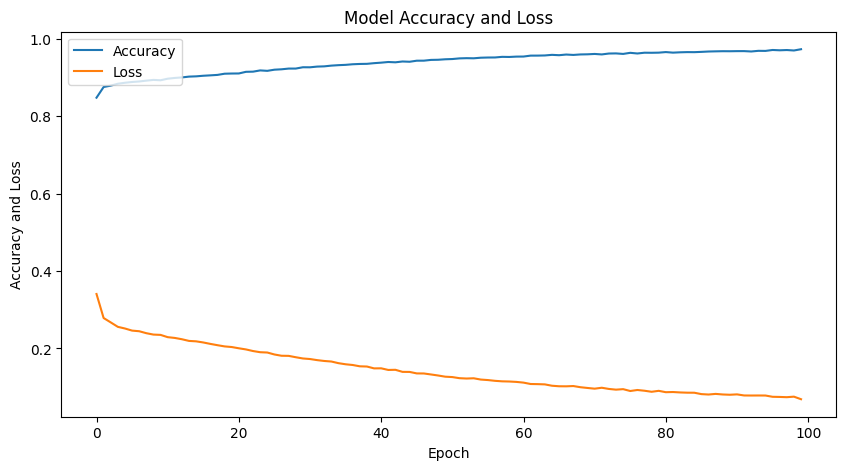

In [30]:
model_history = ann_model.history.history

plt.figure(figsize = (10,5))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [31]:
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Accuracy Score :',accuracy_score(y_test,y_pred_ann))

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy Score : 0.8833859350975156


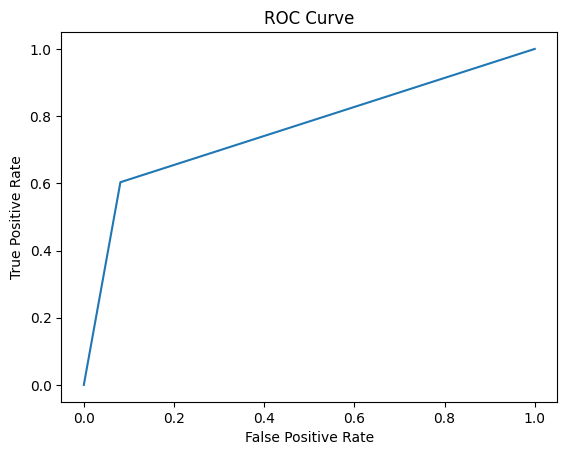

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(y_test,y_pred_ann)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [33]:
!pip install keras_tuner

In [34]:
# Function to build the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Tune the number of layers and neurons per layer
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                                activation=hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])))

        # Tune dropout rate
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.01, 0.001, 0.0001])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Keras Tuner: Hyperband search
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='keras_tuner_results',
                     project_name='bank_marketing')

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Run the tuner
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")



Reloading Tuner from keras_tuner_results/bank_marketing/tuner0.json
Epoch 1/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7764 - loss: 0.4907 - val_accuracy: 0.8546 - val_loss: 0.3882
Epoch 2/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8559 - loss: 0.3396 - val_accuracy: 0.6493 - val_loss: 0.7084
Epoch 3/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8622 - loss: 0.3206 - val_accuracy: 0.9049 - val_loss: 0.2897
Epoch 4/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8671 - loss: 0.3154 - val_accuracy: 0.9018 - val_loss: 0.3650
Epoch 5/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8677 - loss: 0.3080 - val_accuracy: 0.8846 - val_loss: 0.3394
Epoch 6/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8702 - loss: 0.3011 - val_accuracy: 0.8765 - val_loss: 0.3674
Epoch 7/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8705 - loss: 0.2990 - val_accuracy: 0.8873 - val_loss: 0.3175
Epoch 8/20
1279/1279

In [38]:
best_hps.values

{'num_layers': 3,
 'units_0': 32,
 'activation_0': 'sigmoid',
 'dropout_0': 0.1,
 'learning_rate': 0.01,
 'units_1': 192,
 'activation_1': 'tanh',
 'dropout_1': 0.0,
 'units_2': 128,
 'activation_2': 'tanh',
 'dropout_2': 0.1,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 3,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0009'}

In [39]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │             672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 192)                 │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,525 (373.15 KB)

 Trainable params: 31,841 (124.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,684 (248.77 KB)

In [40]:
best_hps.get_config

<bound method HyperParameters.get_config of <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7db234d0e250>>

In [41]:
# Save the trained model as a pickle file
import pickle
with open('final_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler for future data preprocessing
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)